In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chokurdakh
Processing Record 2 of Set 1 | srednekolymsk
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | port moresby
Processing Record 7 of Set 1 | salinas
Processing Record 8 of Set 1 | ponta do sol
Processing Record 9 of Set 1 | nanortalik
Processing Record 10 of Set 1 | pringsewu
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | buala
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | bengkulu
Processing Record 17 of Set 1 | lata
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | barrow
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | luderitz
Processing Record 22 of Set 1 | hithadhoo
Processing Recor

Processing Record 37 of Set 4 | ilulissat
Processing Record 38 of Set 4 | bundaberg
Processing Record 39 of Set 4 | aklavik
Processing Record 40 of Set 4 | monrovia
Processing Record 41 of Set 4 | pierre
Processing Record 42 of Set 4 | shitanjing
Processing Record 43 of Set 4 | dien bien
City not found. Skipping...
Processing Record 44 of Set 4 | saint-gabriel
Processing Record 45 of Set 4 | samalaeulu
City not found. Skipping...
Processing Record 46 of Set 4 | jinchang
Processing Record 47 of Set 4 | port blair
Processing Record 48 of Set 4 | narsaq
Processing Record 49 of Set 4 | bocanda
Processing Record 50 of Set 4 | meyungs
City not found. Skipping...
Processing Record 1 of Set 5 | vardo
Processing Record 2 of Set 5 | tasiilaq
Processing Record 3 of Set 5 | yellowknife
Processing Record 4 of Set 5 | samarai
Processing Record 5 of Set 5 | mana
Processing Record 6 of Set 5 | kysyl-syr
Processing Record 7 of Set 5 | santa cruz
Processing Record 8 of Set 5 | codrington
Processing Reco

Processing Record 26 of Set 8 | san quintin
Processing Record 27 of Set 8 | buarcos
Processing Record 28 of Set 8 | key west
Processing Record 29 of Set 8 | utiroa
City not found. Skipping...
Processing Record 30 of Set 8 | batagay-alyta
Processing Record 31 of Set 8 | apan
Processing Record 32 of Set 8 | husavik
Processing Record 33 of Set 8 | shanhetun
Processing Record 34 of Set 8 | fethiye
Processing Record 35 of Set 8 | dingle
Processing Record 36 of Set 8 | playa del carmen
Processing Record 37 of Set 8 | faanui
Processing Record 38 of Set 8 | bambanglipuro
Processing Record 39 of Set 8 | shache
Processing Record 40 of Set 8 | afyonkarahisar
Processing Record 41 of Set 8 | dunedin
Processing Record 42 of Set 8 | elko
Processing Record 43 of Set 8 | ordynskoye
Processing Record 44 of Set 8 | hofn
Processing Record 45 of Set 8 | severo-yeniseyskiy
Processing Record 46 of Set 8 | praia da vitoria
Processing Record 47 of Set 8 | san patricio
Processing Record 48 of Set 8 | bardiyah
P

Processing Record 14 of Set 12 | nyurba
Processing Record 15 of Set 12 | komatipoort
Processing Record 16 of Set 12 | labytnangi
Processing Record 17 of Set 12 | conde
Processing Record 18 of Set 12 | san luis
Processing Record 19 of Set 12 | bandarbeyla
Processing Record 20 of Set 12 | ongandjera
Processing Record 21 of Set 12 | taft
Processing Record 22 of Set 12 | ketchikan
Processing Record 23 of Set 12 | launceston
Processing Record 24 of Set 12 | amga
Processing Record 25 of Set 12 | bubaque
Processing Record 26 of Set 12 | east wenatchee bench
Processing Record 27 of Set 12 | iskateley
Processing Record 28 of Set 12 | cururupu
Processing Record 29 of Set 12 | mattru
Processing Record 30 of Set 12 | duobao
Processing Record 31 of Set 12 | sagua la grande
Processing Record 32 of Set 12 | smithers
Processing Record 33 of Set 12 | kayerkan
Processing Record 34 of Set 12 | brae
Processing Record 35 of Set 12 | wajir
Processing Record 36 of Set 12 | ambilobe
Processing Record 37 of Se

In [8]:
len(city_data)

562

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chokurdakh,70.6333,147.9167,0.68,100,98,4.59,RU,2021-10-09 16:17:40
1,Srednekolymsk,67.4500,153.6833,9.45,96,90,4.43,RU,2021-10-09 16:17:40
2,Rikitea,-23.1203,-134.9692,73.98,81,8,16.93,PF,2021-10-09 16:17:40
3,Kapaa,22.0752,-159.3190,75.52,74,40,5.01,US,2021-10-09 16:17:41
4,Port Moresby,-9.4431,147.1797,75.85,92,61,9.86,PG,2021-10-09 16:17:41
5,Salinas,36.6777,-121.6555,61.32,63,1,9.22,US,2021-10-09 16:17:42
6,Ponta Do Sol,32.6667,-17.1000,80.01,69,23,1.59,PT,2021-10-09 16:17:42
7,Nanortalik,60.1432,-45.2371,38.75,77,20,3.89,GL,2021-10-09 16:17:42
8,Pringsewu,-5.3582,104.9744,75.87,94,77,3.62,ID,2021-10-09 16:17:43
9,Jamestown,42.0970,-79.2353,65.34,97,90,10.00,US,2021-10-09 16:17:43


In [10]:
new_column_order= ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df= city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chokurdakh,RU,2021-10-09 16:17:40,70.6333,147.9167,0.68,100,98,4.59
1,Srednekolymsk,RU,2021-10-09 16:17:40,67.4500,153.6833,9.45,96,90,4.43
2,Rikitea,PF,2021-10-09 16:17:40,-23.1203,-134.9692,73.98,81,8,16.93
3,Kapaa,US,2021-10-09 16:17:41,22.0752,-159.3190,75.52,74,40,5.01
4,Port Moresby,PG,2021-10-09 16:17:41,-9.4431,147.1797,75.85,92,61,9.86


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

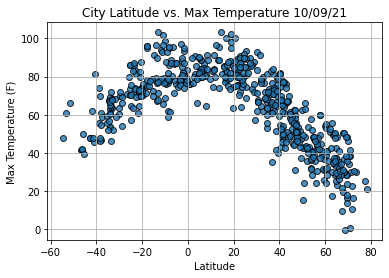

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

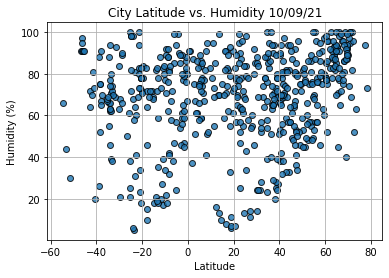

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

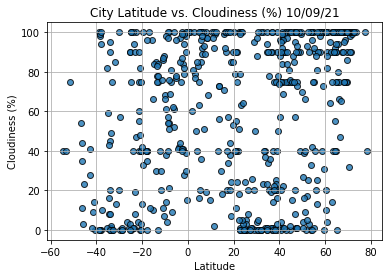

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

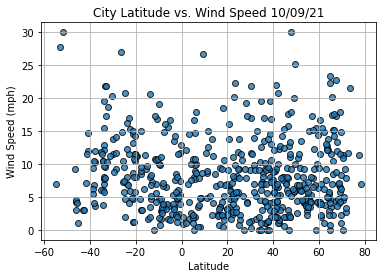

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                      Mataura
Country                        NZ
Date          2021-10-09 16:17:45
Lat                      -46.1927
Lng                      168.8643
Max Temp                    41.49
Humidity                       97
Cloudiness                     35
Wind Speed                   3.06
Name: 13, dtype: object

In [20]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4      False
       ...  
557    False
558     True
559    False
560     True
561     True
Name: Lat, Length: 562, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chokurdakh,RU,2021-10-09 16:17:40,70.6333,147.9167,0.68,100,98,4.59
1,Srednekolymsk,RU,2021-10-09 16:17:40,67.4500,153.6833,9.45,96,90,4.43
3,Kapaa,US,2021-10-09 16:17:41,22.0752,-159.3190,75.52,74,40,5.01
5,Salinas,US,2021-10-09 16:17:42,36.6777,-121.6555,61.32,63,1,9.22
6,Ponta Do Sol,PT,2021-10-09 16:17:42,32.6667,-17.1000,80.01,69,23,1.59


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

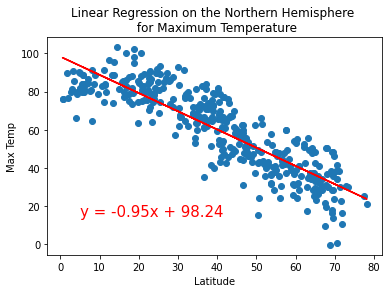

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp', (5,15))

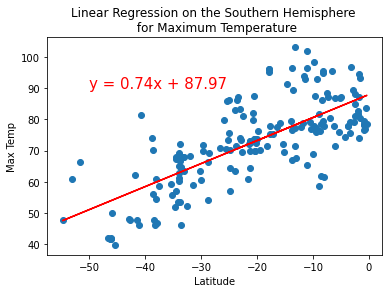

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

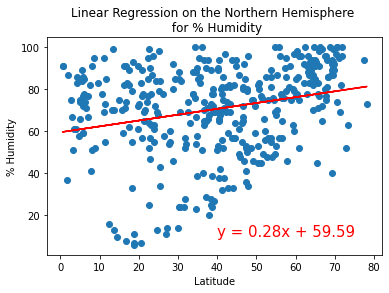

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

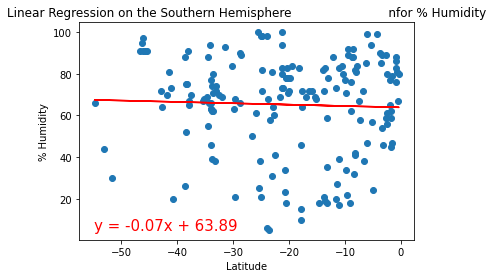

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        nfor % Humidity', '% Humidity',(-55,5))

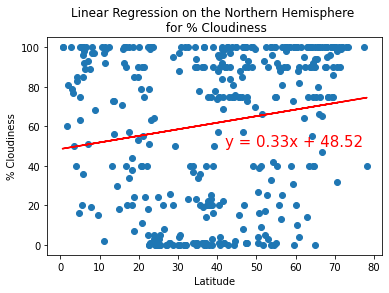

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(42,50))

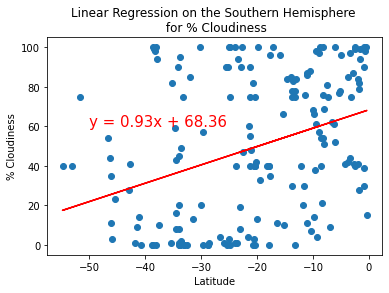

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

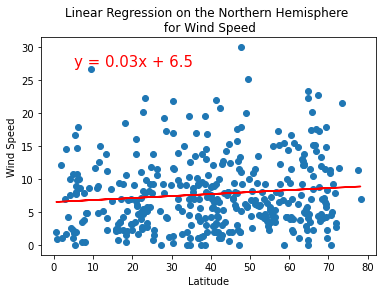

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(5,27))

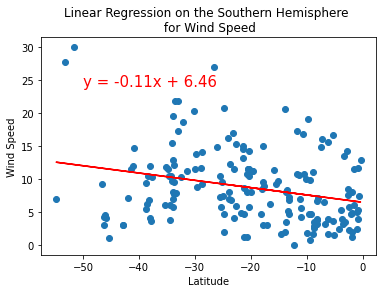

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,24))